<a href="https://colab.research.google.com/github/mlsanyang1/Image_Detection_SSD/blob/main/Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPUTER VISION (DEEP LEARNING)


In [1]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

RUNNING THE MODEL

In [2]:
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:00<00:00, 148MB/s]


PUTTING THE MODEL IN THE EVALUASION MODE

In [3]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

GENERATING THE GITHUB LINK THAT HELD THE PICTURE

In [4]:
ig = Image.open("/content/drive/MyDrive/coco_dataset_2/fleet.jpeg")

CONVERTING THE IMAGE INTO TENSOR FORMART

In [5]:
transform  = T.ToTensor()
img_tensor = transform(ig)

In [6]:
with torch.no_grad():
  prediction = model([img_tensor])

PRINTING THE PREDICTION OF THE MODEL

In [7]:
prediction

[{'boxes': tensor([[ 81.9520,  39.4168, 236.5934, 284.7588],
          [222.0117,  55.5992, 322.3846, 243.2337],
          [337.4311, 152.8550, 393.9500, 230.4357],
          [183.4865, 136.3230, 203.4559, 176.0642],
          [ 79.8948, 199.7725, 223.4187, 283.1082],
          [233.2811, 165.7027, 317.3300, 242.7855],
          [265.4235, 143.3947, 360.4587, 234.1370],
          [339.7376, 193.8809, 387.3941, 229.4142],
          [304.3149, 126.7965, 390.8688, 226.9086],
          [332.6017,  76.9295, 410.6824, 236.8816],
          [121.7628,  45.9091, 328.8698, 263.3463],
          [324.3046, 144.5274, 366.9218, 231.7595],
          [287.0630, 165.4201, 344.3085, 224.0540],
          [238.3403, 157.5483, 324.0930, 199.8179],
          [309.5124, 156.9821, 385.8240, 199.7036],
          [234.9448, 176.4504, 328.5508, 210.5676],
          [310.4807, 173.6226, 385.8770, 219.0086],
          [256.9844, 196.3054, 353.1629, 231.1401],
          [242.1667, 200.5477, 312.7054, 246.1659],
   

THE LENGTH OF PRE IS

In [8]:
print("the length of Prediction is: ", len(prediction))

the length of Prediction is:  1


PRINTING THE FIRST ELEMENT OF PREDICTION

In [9]:
print("The first element of Prediction is: ", prediction[0])

The first element of Prediction is:  {'boxes': tensor([[ 81.9520,  39.4168, 236.5934, 284.7588],
        [222.0117,  55.5992, 322.3846, 243.2337],
        [337.4311, 152.8550, 393.9500, 230.4357],
        [183.4865, 136.3230, 203.4559, 176.0642],
        [ 79.8948, 199.7725, 223.4187, 283.1082],
        [233.2811, 165.7027, 317.3300, 242.7855],
        [265.4235, 143.3947, 360.4587, 234.1370],
        [339.7376, 193.8809, 387.3941, 229.4142],
        [304.3149, 126.7965, 390.8688, 226.9086],
        [332.6017,  76.9295, 410.6824, 236.8816],
        [121.7628,  45.9091, 328.8698, 263.3463],
        [324.3046, 144.5274, 366.9218, 231.7595],
        [287.0630, 165.4201, 344.3085, 224.0540],
        [238.3403, 157.5483, 324.0930, 199.8179],
        [309.5124, 156.9821, 385.8240, 199.7036],
        [234.9448, 176.4504, 328.5508, 210.5676],
        [310.4807, 173.6226, 385.8770, 219.0086],
        [256.9844, 196.3054, 353.1629, 231.1401],
        [242.1667, 200.5477, 312.7054, 246.1659],
   

THE TYPE OF PREDICTION IS

In [10]:
print("The type of Prediction is: ", type(prediction))

The type of Prediction is:  <class 'list'>


ELEMENTS/KEYD FOUND IN PREDICTION





In [12]:
print("Prediction at index[0].keys is: ", prediction[0].keys())

Prediction at index[0].keys is:  dict_keys(['boxes', 'scores', 'labels'])


USING BOUNDIG BOXES FOR VARIOUS KEYS IN THE IMAGE

In [13]:
bboxes , scores , labels = prediction[0]['boxes'] , prediction[0]['scores'] , prediction[0]['labels']

ONLY BOXES WILL APPEAR HERE AND THE LABELS ARE IN A DIIFERENT VARIABLE



In [14]:
bboxes

tensor([[ 81.9520,  39.4168, 236.5934, 284.7588],
        [222.0117,  55.5992, 322.3846, 243.2337],
        [337.4311, 152.8550, 393.9500, 230.4357],
        [183.4865, 136.3230, 203.4559, 176.0642],
        [ 79.8948, 199.7725, 223.4187, 283.1082],
        [233.2811, 165.7027, 317.3300, 242.7855],
        [265.4235, 143.3947, 360.4587, 234.1370],
        [339.7376, 193.8809, 387.3941, 229.4142],
        [304.3149, 126.7965, 390.8688, 226.9086],
        [332.6017,  76.9295, 410.6824, 236.8816],
        [121.7628,  45.9091, 328.8698, 263.3463],
        [324.3046, 144.5274, 366.9218, 231.7595],
        [287.0630, 165.4201, 344.3085, 224.0540],
        [238.3403, 157.5483, 324.0930, 199.8179],
        [309.5124, 156.9821, 385.8240, 199.7036],
        [234.9448, 176.4504, 328.5508, 210.5676],
        [310.4807, 173.6226, 385.8770, 219.0086],
        [256.9844, 196.3054, 353.1629, 231.1401],
        [242.1667, 200.5477, 312.7054, 246.1659],
        [296.5867, 141.4198, 330.7622, 233.9856],


NOW SCORES IS PRINTING IN A SEOERATE VARIABLE

In [15]:
scores

tensor([0.9672, 0.8147, 0.3214, 0.1702, 0.1605, 0.1549, 0.1466, 0.1458, 0.1381,
        0.1323, 0.1286, 0.1285, 0.1278, 0.1264, 0.1264, 0.1250, 0.1244, 0.1233,
        0.1208, 0.1202, 0.1190, 0.1181, 0.1168, 0.1164, 0.1158, 0.1138, 0.1108,
        0.1108, 0.1101, 0.1100, 0.1091, 0.1085, 0.1081, 0.1076, 0.1067, 0.1062,
        0.1055, 0.1047, 0.1043, 0.1036, 0.1036, 0.1033, 0.1024, 0.1021, 0.1017,
        0.1010, 0.1007, 0.1007, 0.1003, 0.0995, 0.0992, 0.0991, 0.0989, 0.0988,
        0.0981, 0.0979, 0.0974, 0.0972, 0.0970, 0.0970, 0.0970, 0.0969, 0.0967,
        0.0962, 0.0958, 0.0956, 0.0947, 0.0942, 0.0942, 0.0942, 0.0938, 0.0936,
        0.0932, 0.0928, 0.0926, 0.0925, 0.0925, 0.0925, 0.0924, 0.0924, 0.0921,
        0.0893, 0.0862, 0.0837, 0.0740, 0.0711, 0.0687, 0.0652, 0.0650, 0.0627,
        0.0598, 0.0597, 0.0572, 0.0570, 0.0569, 0.0567, 0.0564, 0.0562, 0.0560,
        0.0550, 0.0550, 0.0549, 0.0548, 0.0547, 0.0540, 0.0539, 0.0539, 0.0537,
        0.0535, 0.0534, 0.0532, 0.0528, 

PRINTING THE LABELS

In [16]:
labels

tensor([ 9,  9,  9,  1,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  1,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1, 85,  1,  1,  1, 10,  1,  1,  1,  1,  1, 85,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,  1,  1,  1,  1,  1,  1,
         1,  1, 81,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  1,  1,
         1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1])

PRINTING THE TOTAL VALUES OF LABELS

In [17]:
labels.shape

torch.Size([200])

PRINTING VALUES THAT ARE > 0.5

In [18]:
num = torch.argwhere(scores > 0.5).shape[0]

CREATING A VARIABLE THAT STORES THE DATASET

In [19]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , "frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , "baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , "plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , "banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" , "pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" , "mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" , "laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" , "oven" , "toaster" , "sink" , "refrigerator" , "blender" , "ship" , "container" , "book" , "clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

DISPLAYING THE IMAGE
x1 y1 are the top let  cordidates and x2 y2 are the bottom right corner of the boxes

In [20]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [21]:
img = cv2.imread("/content/drive/MyDrive/coco_dataset_2/fleet.jpeg")
for i in range(num):
  x1 , y1 , x2 , y2 = bboxes[i].numpy().astype("int")
  img = cv2.rectangle(img , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 1)
  class_name = coco_names[labels.numpy()[i] -1]
  img = cv2.putText(img , class_name , (x1 , y1 - 10) , font , 0.5 , (255 , 0 , 0) , 1 , cv2.LINE_AA)


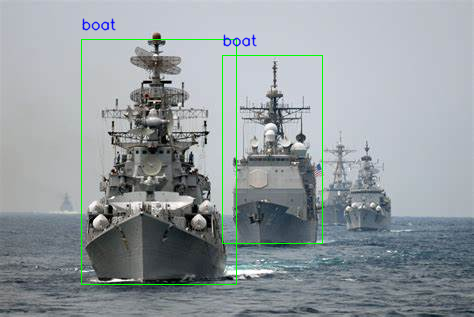

In [22]:
cv2_imshow(img)